In [1]:
%cd /content/drive/MyDrive/My Projects/celeb-LBP-face-recognition/

/content/drive/MyDrive/My Projects/celeb-LBP-face-recognition


In [2]:
!pip install import-ipynb
import import_ipynb
from face import face_detection
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2
import os

importing Jupyter notebook from face.ipynb


In [3]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [4]:
desc = LocalBinaryPatterns(8 , 2)

In [5]:
def preprocess_img(imagePath):
  img = cv2.imread(imagePath)
  rects = face_detection(img)
  for (x , y , w , h) in rects:
    face = img[y:y+h , x:x+w]

  face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
  # plt.imshow(face , cmap="gray")
  # print(face.shape)
  # face = np.array(face)
  
  lbp , hist = desc.describe(face)
  return lbp , hist

In [6]:
imagePath = "celeb-data/Tom_Cruise/Tom_Cruise_2.jpg"

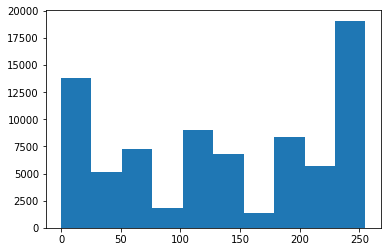

In [7]:
lbp , hist = preprocess_img(imagePath)

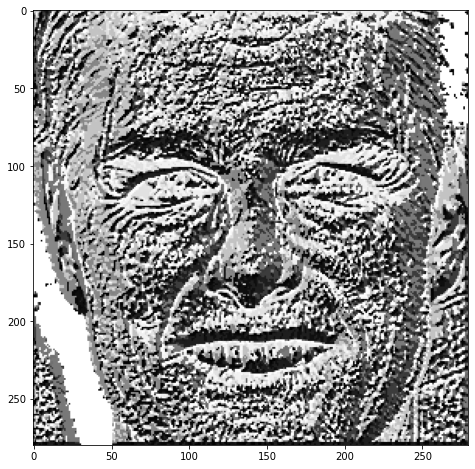

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(lbp , cmap="gray")
# plt.savefig("output/extraction-results/extracted-face.png")